<a href="https://colab.research.google.com/github/jamelof23/Latent_Attribute_Privacy/blob/main/Empirical_Covering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Generator ready.
[INFO] Upload latent .npy (shape (1,512) or (512,))


Saving 777.npy to 777.npy
Original latent image:


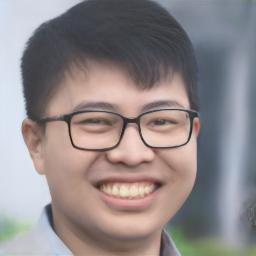

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Setup + load InterfaceGAN generator (GPU) + boundaries + latent
# ==== ENV & REPO ====
import os, sys, io, cv2, numpy as np
from PIL import Image
import IPython.display as display

os.chdir('/content')
CODE_DIR = 'Latent_Attribute_Privacy'
!git clone -q https://github.com/jamelof23/Latent_Attribute_Privacy $CODE_DIR
os.chdir(f'./{CODE_DIR}/models/interfacegan_official')
!mkdir -p models/pretrain
!wget -q https://www.dropbox.com/s/qyv37eaobnow7fu/stylegan_ffhq.pth?dl=1 -O models/pretrain/stylegan_ffhq.pth

# ==== IMPORTS ====
from models.model_settings import MODEL_POOL
from models.stylegan_generator import StyleGANGenerator
from google.colab import files  # for auto-downloads

def build_generator(model_name):
    gan_type = MODEL_POOL[model_name]['gan_type']
    assert gan_type == 'stylegan'
    return StyleGANGenerator(model_name)

model_name = "stylegan_ffhq"
latent_space_type = "W"  # we work in W
generator = build_generator(model_name)
synthesis_kwargs = {'latent_space_type': 'W'}
print("✅ Generator ready.")

# ==== BOUNDARIES: Age (target), Gender (non-target) ====
# Put your .npy boundaries under: Latent_Attribute_Privacy/models/interfacegan_official/boundaries/
# e.g. stylegan_ffhq_age_w_boundary.npy, stylegan_ffhq_gender_w_boundary.npy
age_path    = 'boundaries/stylegan_ffhq_age_w_boundary.npy'
gender_path = 'boundaries/stylegan_ffhq_gender_w_boundary.npy'
assert os.path.exists(age_path) and os.path.exists(gender_path), "Boundary npy files not found."

b_age    = np.load(age_path).astype(np.float64).reshape(-1)
b_gender = np.load(gender_path).astype(np.float64).reshape(-1)

# Normalize
b_age    /= (np.linalg.norm(b_age) + 1e-12)
b_gender /= (np.linalg.norm(b_gender) + 1e-12)

# ==== UPLOAD LATENT ====
print("[INFO] Upload latent .npy (shape (1,512) or (512,))")
uploaded = files.upload()
latent_path = list(uploaded.keys())[0]
latent_codes = np.load(latent_path).astype(np.float64)
if latent_codes.ndim == 2 and latent_codes.shape == (1,512):
    w0 = latent_codes[0]
elif latent_codes.ndim == 1 and latent_codes.shape[0] == 512:
    w0 = latent_codes
else:
    raise ValueError(f"Latent must be (1,512) or (512,), got {latent_codes.shape}")

# Quick preview synth
def imshow(image, viz=256):
    h, w, _ = image.shape
    if (h,w)!=(viz,viz):
        image = cv2.resize(image, (viz, viz))
    buf = io.BytesIO(); Image.fromarray(image.astype(np.uint8)).save(buf,'jpeg')
    display.display(display.Image(buf.getvalue()))

x0 = generator.easy_synthesize(w0[np.newaxis,:], **synthesis_kwargs)['image'][0]
print("Original latent image:")
imshow(x0)

# Save & auto-download the original image
orig_path = '/content/original.png'
Image.fromarray(x0.astype(np.uint8)).save(orig_path)
try:
    files.download(orig_path)
except Exception as e:
    print("Download skipped (Colab-only):", e)


[diag] cos(angle(age, gender)) BEFORE = 0.0706
[diag] cos(angle(age_orth, gender)) AFTER  = 1.4156e-13
Subspace dim k=1, ambient d=512
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s e

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

[anchor refined] α ≈ 4.8000  score ≈ -7.4372e-03
Reference (re-centered) image:


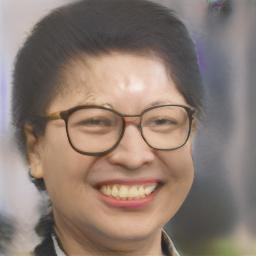

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ==== SUBSPACE S from boundaries (Age target; can add more cols for joint case) ====
# For single-attribute Age: N = [b_age]; for joint add more columns, e.g., np.stack([b_age, b_smile, ...], 1)

# (A) Orthogonalize Age against Gender to reduce leakage
def cosine(u, v):
    return float(np.dot(u, v) / ((np.linalg.norm(u)+1e-12)*(np.linalg.norm(v)+1e-12)))

print(f"[diag] cos(angle(age, gender)) BEFORE = {cosine(b_age, b_gender):.4f}")
b_age_orth = b_age - (np.dot(b_age, b_gender)) * b_gender
b_age_orth /= (np.linalg.norm(b_age_orth) + 1e-12)
print(f"[diag] cos(angle(age_orth, gender)) AFTER  = {cosine(b_age_orth, b_gender):.4e}")

# Use the orthogonalized Age for the subspace
N = b_age_orth[:,None]  # d x k ; here k=1

# Orthonormalize N -> Q_S (Gram–Schmidt via QR)
Q, _ = np.linalg.qr(N)  # d x k, columns orthonormal
k = Q.shape[1]
d = Q.shape[0]
print(f"Subspace dim k={k}, ambient d={d}")

# Projector Pi_S = Q Q^T (we'll use Q directly for sampling)
# Pi_S = Q @ Q.T  # not needed explicitly for sampling

# ==== Reference edit (temporary) ====
alpha_init = 2.0  # initial guess (not final)
w_tmp = w0 + alpha_init * b_age_orth
x_tmp = generator.easy_synthesize(w_tmp[np.newaxis,:], **synthesis_kwargs)['image'][0]
Image.fromarray(x_tmp.astype(np.uint8)).save('/content/ref_alpha_init.png')

# ==== CLIP scorer f_S  (public attribute scorer) ====
!pip -q install open_clip_torch ftfy regex
import torch, open_clip

device = 'cuda' if torch.cuda.is_available() else 'cpu'
clip_model, clip_preprocess, _ = open_clip.create_model_and_transforms(
    'ViT-B-16', pretrained='laion2b_s34b_b88k', device=device)
clip_model = clip_model.to(device)
clip_model.eval()
clip_tokenizer = open_clip.get_tokenizer('ViT-B-16')

# Prompts (face-specific helps stability)
texts_age    = clip_tokenizer(["a young adult face, portrait", "an elderly face, portrait"]).to(device)
texts_gender = clip_tokenizer(["a portrait photo of a male face", "a portrait photo of a female face"]).to(device)

with torch.no_grad():
    text_emb_age    = clip_model.encode_text(texts_age);    text_emb_age    /= text_emb_age.norm(dim=-1, keepdim=True)
    text_emb_gender = clip_model.encode_text(texts_gender); text_emb_gender /= text_emb_gender.norm(dim=-1, keepdim=True)

def _prep_batch(np_batch):
    ims = [Image.fromarray(img.astype(np.uint8)) for img in np_batch]
    ims = torch.stack([clip_preprocess(im) for im in ims]).to(device)
    return ims

@torch.no_grad()
def clip_scores(np_batch):
    """
    Returns dict with COSINE scores (no logit_scale) for age (old-young) and gender (woman-man).
    Each entry shape: [batch]
    """
    ims = _prep_batch(np_batch)
    img_emb = clip_model.encode_image(ims); img_emb /= img_emb.norm(dim=-1, keepdim=True)
    logits_age    = (img_emb @ text_emb_age.T)      # [B,2] cosine
    logits_gender = (img_emb @ text_emb_gender.T)   # [B,2] cosine
    age_score    = (logits_age[:,1] - logits_age[:,0]).detach().cpu().numpy()       # old - young
    gender_score = (logits_gender[:,1] - logits_gender[:,0]).detach().cpu().numpy() # woman - man
    return {'age': age_score, 'gender': gender_score}

# Re-center w_ref near CLIP age boundary (score ≈ 0)
def line_search_alpha_to_score0(w0, v, a_min=-5.0, a_max=5.0, steps=201):
    alphas = np.linspace(a_min, a_max, steps)
    lat_batch = w0[None,:] + alphas[:,None] * v[None,:]
    bs = int(max(1, getattr(generator, 'batch_size', 4)))
    imgs_list = []
    for s in range(0, steps, bs):
        imgs_list.append(generator.easy_synthesize(lat_batch[s:s+bs], **synthesis_kwargs)['image'])
    imgs = np.concatenate(imgs_list, axis=0)
    scores = clip_scores(imgs)['age']  # >0 older, <0 younger
    idx = int(np.argmin(np.abs(scores)))
    return float(alphas[idx]), float(scores[idx]), alphas, scores

def find_bracket_for_zero(alphas, scores):
    # Find consecutive indices with sign change
    for i in range(len(alphas)-1):
        if np.sign(scores[i]) == 0:
            return alphas[i], alphas[i]
        if np.sign(scores[i]) != np.sign(scores[i+1]):
            return alphas[i], alphas[i+1]
    return None

def refine_alpha_bisection(w0, v, a_lo, a_hi, scorer_fn, iters=14):
    alo, ahi = float(a_lo), float(a_hi)
    # if degenerate bracket (exact zero), return
    if alo == ahi:
        x_mid = generator.easy_synthesize((w0 + alo*v)[None,:], **synthesis_kwargs)['image'][0]
        s_mid = scorer_fn([x_mid])['age'][0]
        return alo, s_mid
    # ensure opposite signs
    x_lo = generator.easy_synthesize((w0 + alo*v)[None,:], **synthesis_kwargs)['image'][0]
    x_hi = generator.easy_synthesize((w0 + ahi*v)[None,:], **synthesis_kwargs)['image'][0]
    s_lo = scorer_fn([x_lo])['age'][0]
    s_hi = scorer_fn([x_hi])['age'][0]
    if np.sign(s_lo) == np.sign(s_hi):
        # fallback: return the closer-to-zero endpoint
        if abs(s_lo) <= abs(s_hi): return alo, s_lo
        else: return ahi, s_hi
    for _ in range(iters):
        amid = 0.5*(alo+ahi)
        x_mid = generator.easy_synthesize((w0 + amid*v)[None,:], **synthesis_kwargs)['image'][0]
        s_mid = scorer_fn([x_mid])['age'][0]
        if s_mid == 0: return amid, s_mid
        if np.sign(s_mid) == np.sign(s_lo):
            alo, s_lo = amid, s_mid
        else:
            ahi, s_hi = amid, s_mid
    return amid, s_mid

alpha_star0, score0, alphas_scan, scores_scan = line_search_alpha_to_score0(w0, b_age_orth, -5.0, 5.0, 201)
br = find_bracket_for_zero(alphas_scan, scores_scan)
if br is not None:
    alpha_star, score_at_alpha = refine_alpha_bisection(w0, b_age_orth, br[0], br[1], clip_scores, iters=14)
else:
    alpha_star, score_at_alpha = alpha_star0, score0

print(f"[anchor refined] α ≈ {alpha_star:.4f}  score ≈ {score_at_alpha:.4e}")

w_ref = (w0 + alpha_star * b_age_orth).astype(np.float64)
x_ref = generator.easy_synthesize(w_ref[np.newaxis,:], **synthesis_kwargs)['image'][0]
Image.fromarray(x_ref.astype(np.uint8)).save('/content/ref_recentered.png')
print("Reference (re-centered) image:")
imshow(x_ref)

# Auto-download reference images
for p in ['/content/ref_alpha_init.png', '/content/ref_recentered.png']:
    try: files.download(p)
    except Exception as e: print("Download skipped:", e)


In [ ]:
# ==============================
# C‑LC: Local‑Cover estimate of L_S for each tau (robust)
# ==============================
import numpy as np, math

# --------- Required globals (asserts make failures obvious) ---------
assert 'w_ref' in globals(), "w_ref (latent, shape (d,)) is missing"
assert 'Q'     in globals(), "Q (d×k subspace basis) is missing"
assert 'generator' in globals(), "generator with .easy_synthesize is missing"
assert 'clip_scores' in globals(), "clip_scores(np_batch)->dict is missing"
if 'synthesis_kwargs' not in globals():
    synthesis_kwargs = {}  # safe default

# --------- Tunables (override any of these above this cell if you like) ---------
if 'tau_list' not in globals() or len(tau_list) == 0:
    tau_list = [0.5, 1.0]                      # radii to certify

gamma_margin = float(globals().get('gamma_margin', 2.0))  # margin multiplier for cover
K_dirs       = int(globals().get('K_dirs', 12))           # # of directions (k>1)
radii_fracs  = tuple(globals().get('radii_fracs', (0.0, 0.5, 1.0)))  # radii in [0, tau]
h_dir        = float(globals().get('h_dir', 0.05))        # central diff step along subspace dirs
num_v_dirs   = int(globals().get('num_v_dirs', 16))       # random test dirs for s(w)
seed_cover   = int(globals().get('seed_cover', 0))
seed_dirs    = int(globals().get('seed_dirs', 0))
DUP_TOL      = float(globals().get('DUP_TOL', 1e-9))      # tolerance for near-duplicate points

# Optional: list of attributes for scorer stacking, e.g. ['age','gender'].
# If not provided, we'll auto-pick (age+gender if available, else age).
SCORER_ATTRS = globals().get('SCORER_ATTRS', None)

# --------- Helpers ---------
def _synthesize_batch(lat_batch):
    """Chunked synth to respect generator.batch_size; returns np.array (B,H,W,3)."""
    bs = int(max(1, getattr(generator, 'batch_size', 4)))
    out = []
    for s in range(0, lat_batch.shape[0], bs):
        out.append(generator.easy_synthesize(lat_batch[s:s+bs], **synthesis_kwargs)['image'])
    return np.concatenate(out, axis=0)

def _scorer_local_cover(np_batch):
    """
    Uses SCORER_ATTRS if provided, else tries (age,gender) if available, else 'age', else first key.
    Returns [B] or [B,m].
    """
    s = clip_scores(np_batch)
    if isinstance(s, dict):
        if SCORER_ATTRS:
            arrs = [s[a] for a in SCORER_ATTRS]
            return np.stack(arrs, axis=1)
        keys = set(s.keys())
        if {'age','gender'}.issubset(keys):
            return np.stack([s['age'], s['gender']], axis=1)
        if 'age' in keys:
            return s['age']
        k0 = next(iter(keys))
        return s[k0]
    return s

def _estimate_s_at_w(w, Q, scorer_fn, h_dir=0.05, num_v_dirs=16, seed=0):
    """
    s(w) = ||J_f(w) Q||_2  via directional central differences:
       ≈ max_v  || f(w+h·Qv) - f(w-h·Qv) || / (2h),   v ~ Unif(S^{k-1})
    scorer_fn returns [B] or [B,m].
    """
    d, k = Q.shape
    rng = np.random.default_rng(seed)
    V = rng.normal(size=(num_v_dirs, k))
    V /= (np.linalg.norm(V, axis=1, keepdims=True) + 1e-12)

    lat_plus, lat_minus = [], []
    for v in V:
        dv = Q @ v
        lat_plus.append (w + h_dir * dv)
        lat_minus.append(w - h_dir * dv)
    lat_pair = np.vstack([np.stack(lat_plus), np.stack(lat_minus)])  # [2*num_v, d]

    imgs = _synthesize_batch(lat_pair)
    s = np.asarray(scorer_fn(imgs))
    if s.ndim == 1:
        s_plus, s_minus = s[:len(V)], s[len(V):]
        deriv = np.abs(s_plus - s_minus) / (2*h_dir)                 # [num_v]
    elif s.ndim == 2:
        s_plus, s_minus = s[:len(V), :], s[len(V):, :]
        deriv = np.linalg.norm(s_plus - s_minus, axis=1) / (2*h_dir) # [num_v]
    else:
        raise ValueError(f"scorer_fn must return [B] or [B,m], got shape {s.shape}")
    return float(deriv.max())

# --- PATCHED: robust cover builder (handles k=1; avoid duplicates at t=0) ---
def _build_cover_points(w_ref, Q, tau, K_dirs=12, radii_fracs=(0.0, 0.5, 1.0), seed=0):
    """
    Cover points: { w_ref + t_j * u_i } with u_i unit in S and t_j in [0, tau].
    - For k=1, use directions U = {+1, -1} (exact, no duplicates).
    - For t=0, add exactly ONE center point (avoid K duplicates at the origin).
    """
    k = Q.shape[1]
    rng = np.random.default_rng(seed)

    if k == 1:
        U = np.array([[1.0], [-1.0]], dtype=float)  # deterministic, no dupes
    else:
        U = rng.normal(size=(K_dirs, k))
        U /= (np.linalg.norm(U, axis=1, keepdims=True) + 1e-12)  # unit in R^k

    radii = tau * np.array(radii_fracs, dtype=float)
    cover = []
    for t in radii:
        if np.isclose(t, 0.0):
            cover.append(w_ref.copy())                    # only ONE center point
        else:
            for u in U:
                cover.append(w_ref + (Q @ (t * u)))
    cover = np.stack(cover, axis=0)
    return cover, U, radii  # [N, d], [K,k], [T]

# --- PATCHED: robust covering radius (ignore duplicates/near-duplicates) ---
def _cover_radius(pts, tol=DUP_TOL):
    """
    Approx covering radius in ambient space:
      max_i min_{j!=i} ||p_i - p_j||,
    but ignore duplicate/near-duplicate points (< tol) so they don't force radius ~ 0.
    """
    N = pts.shape[0]
    if N <= 1:
        return 0.0
    dists = np.linalg.norm(pts[:,None,:] - pts[None,:,:], axis=-1)
    np.fill_diagonal(dists, np.inf)   # ignore self
    dists[dists < tol] = np.inf       # ignore (near-)duplicates
    min_d = np.min(dists, axis=1)
    min_d = np.where(np.isfinite(min_d), min_d, 0.0)  # rows with no distinct neighbor → 0
    return float(np.max(min_d))

# --- PATCHED: robust MhatJ estimate (ignore duplicate neighbors) ---
def _estimate_MJ(pts, s_vals, tol=DUP_TOL):
    """
    Rough Lipschitz constant of s(w)=||J_f(w)Q|| on the cover:
      max_i |s_i - s_j(i)| / ||w_i - w_j(i)||,
    where j(i) is the nearest DISTINCT neighbor (distance >= tol).
    """
    N = pts.shape[0]
    if N <= 1:
        return 0.0
    dists = np.linalg.norm(pts[:,None,:] - pts[None,:,:], axis=-1)
    np.fill_diagonal(dists, np.inf)
    dists[dists < tol] = np.inf  # ignore (near-)duplicates
    nn_idx  = np.argmin(dists, axis=1)
    nn_dist = dists[np.arange(N), nn_idx]
    mask = np.isfinite(nn_dist) & (nn_dist > 0)
    ratios = np.zeros(N, dtype=float)
    if np.any(mask):
        ratios[mask] = np.abs(s_vals[mask] - s_vals[nn_idx[mask]]) / nn_dist[mask]
    return float(np.max(ratios))

def estimate_LS_local_cover(
    w_ref, Q, tau,
    scorer_fn,
    K_dirs=12, radii_fracs=(0.0, 0.5, 1.0),
    h_dir=0.05, num_v_dirs=16,
    gamma_margin=2.0,
    seed_cover=0, seed_dirs=0
):
    """
    Returns (Lhat_cover_safe, details) where:
      Lhat_cover_safe = max_w s(w) + gamma_margin * MhatJ * h_cover
      with s(w) ≈ max_v directional central diff at w inside subspace S.
    """
    cover_pts, U, radii = _build_cover_points(w_ref, Q, tau, K_dirs, radii_fracs, seed_cover)

    # Evaluate s(w) at each cover point
    s_vals = []
    for i, w in enumerate(cover_pts):
        s_vals.append(_estimate_s_at_w(w, Q, scorer_fn, h_dir=h_dir, num_v_dirs=num_v_dirs, seed=seed_dirs+i))
    s_vals = np.array(s_vals, dtype=float)
    s_max = float(np.max(s_vals)) if s_vals.size else 0.0

    # Mesh/cover parameters for the safety margin
    h_cover = _cover_radius(cover_pts)           # robust covering radius
    MhatJ   = _estimate_MJ(cover_pts, s_vals)    # robust local smoothness of s(w)
    beta    = gamma_margin * MhatJ * h_cover
    Lhat_cover_safe = s_max + beta

    details = {
        's_max': s_max,
        'h_cover': h_cover,
        'MhatJ': MhatJ,
        'beta': beta,
        'cover_count': cover_pts.shape[0],
        'K_dirs': K_dirs,
        'radii': list(map(float, radii)),
        'num_v_dirs': num_v_dirs,
        'h_dir': h_dir,
        'gamma_margin': gamma_margin
    }
    return Lhat_cover_safe, details

# --------- Compute LS_COVER for all tau (used by Block D) ---------
LS_COVER   = {}
LS_DETAILS = {}
for tau in tau_list:
    Lhat, info = estimate_LS_local_cover(
        w_ref, Q, tau,
        scorer_fn=_scorer_local_cover,
        K_dirs=K_dirs, radii_fracs=radii_fracs,
        h_dir=h_dir, num_v_dirs=num_v_dirs,
        gamma_margin=gamma_margin,
        seed_cover=seed_cover, seed_dirs=seed_dirs
    )
    LS_COVER[tau]   = float(Lhat)
    LS_DETAILS[tau] = info

print("[C‑LC] Completed. Per‑τ safe L_S estimates:")
for t in tau_list:
    inf = LS_DETAILS[t]
    print(f"  τ={t}: Lhat_safe={LS_COVER[t]:.6f}  (s_max={inf['s_max']:.6f}, β={inf['beta']:.6f}, "
          f"h_cover={inf['h_cover']:.6e}, MhatJ={inf['MhatJ']:.3e}, cover={inf['cover_count']})")


[C‑LC] Completed. Per‑τ safe L_S estimates:
  τ=0.5: Lhat_safe=0.478545  (s_max=0.235970, β=0.242575, h_cover=2.500000e-01, MhatJ=4.851e-01, cover=5)
  τ=1.0: Lhat_safe=0.493573  (s_max=0.268414, β=0.225159, h_cover=5.000000e-01, MhatJ=2.252e-01, cover=5)


In [ ]:
# === D: Monte‑Carlo experiment (subspace vs. isotropic norm‑match vs. isotropic DP ambient)
import os, math, csv, glob, numpy as np
from PIL import Image
from google.colab import files
from skimage.metrics import structural_similarity as ssim

# -----------------------------
# Budgets / defaults
# -----------------------------
if 'eps_list' not in globals(): eps_list = [0.2, 0.5, 1.0, 2.0]
if 'tau_list' not in globals(): tau_list = [0.5, 1.0]
delta = globals().get('delta', 1e-5)
K     = int(globals().get('K_MC', 200))  # 50 for smoke tests, 200–300 for paper plots

out_dir = '/content/results_empirical'
os.makedirs(out_dir, exist_ok=True)

# -----------------------------
# Helpers
# -----------------------------
def identity_ssim(img_ref, img):   # higher is better
    return float(ssim(img_ref, img, channel_axis=2, data_range=255))

def perceptual_1mssim(img_ref, img):   # lower is better
    return 1.0 - identity_ssim(img_ref, img)

# Attack via CLIP (target = sign at x_ref)
y_ref = (clip_scores([x_ref])['age'][0] >= 0.0)
def attack_success(img):
    return 1 if (clip_scores([img])['age'][0] >= 0.0) == y_ref else 0

# Leakage via CLIP (non-target gender)
g_ref = clip_scores([x_ref])['gender'][0]
def leakage(img):
    return abs(clip_scores([img])['gender'][0] - g_ref)

def clip_to_tau(vec, tau):
    n = np.linalg.norm(vec)
    return vec if n <= tau else vec * (tau / (n + 1e-12))

# -----------------------------
# Ambient Lipschitz fallback (if not provided)
# -----------------------------
def clip_age_gender_vector(np_batch):
    s = clip_scores(np_batch)
    return np.stack([s['age'], s['gender']], axis=1)

def estimate_Lfull_ambient_cdiff(
    w_ref, h=0.05, num_dirs=128, seed=7, scorer_fn=clip_age_gender_vector
):
    """Ambient spectral norm via central differences over random directions in R^d."""
    rng = np.random.default_rng(seed)
    d = w_ref.shape[0]
    dirs = rng.normal(size=(num_dirs, d))
    dirs /= (np.linalg.norm(dirs, axis=1, keepdims=True) + 1e-12)

    bs_default = int(max(1, getattr(generator, 'batch_size', 4)))
    deriv_all = []
    for s0 in range(0, num_dirs, bs_default):
        v = dirs[s0:s0+bs_default]
        lat_plus  = w_ref[None,:] + h * v
        lat_minus = w_ref[None,:] - h * v
        imgs_p = generator.easy_synthesize(lat_plus,  **synthesis_kwargs)['image']
        imgs_m = generator.easy_synthesize(lat_minus, **synthesis_kwargs)['image']
        s_p = np.asarray(scorer_fn(imgs_p))
        s_m = np.asarray(scorer_fn(imgs_m))
        if s_p.ndim == 1:
            deriv_blk = np.abs(s_p - s_m) / (2*h)
        else:
            deriv_blk = np.linalg.norm(s_p - s_m, axis=-1) / (2*h)
        deriv_all.append(deriv_blk)
    deriv = np.concatenate(deriv_all, axis=0)
    return float(np.max(deriv)), deriv

# Prepare per‑tau Local‑Cover constants (must come from C‑LC)
if 'LS_COVER' not in globals() or not isinstance(LS_COVER, dict) or len(LS_COVER)==0:
    raise RuntimeError("LS_COVER not found. Run Block C‑LC first (it now computes LS_COVER).")

sqrt_term = math.sqrt(2.0 * math.log(1.25 / delta))
C_SUB_BY_TAU = {tau: LS_COVER[tau] * sqrt_term for tau in LS_COVER}

# Ambient constant (estimate if missing)
if 'Lfull_est_safe' not in globals():
    Lfull_hat, _ = estimate_Lfull_ambient_cdiff(w_ref, h=0.05, num_dirs=128, seed=7)
    SAFETY_FULL  = float(globals().get('SAFETY_FULL', 1.50))  # slightly stronger safety for ambient
    Lfull_est_safe = max(Lfull_hat * SAFETY_FULL, max(LS_COVER.values()))
    print(f"[Ambient] L_full_hat={Lfull_hat:.4f}  → safe={Lfull_est_safe:.4f}")
else:
    print(f"[Ambient] using provided safe L_full={Lfull_est_safe:.4f}")

# -----------------------------
# CSV init (17 columns)
# -----------------------------
csv_path = f"{out_dir}/summary_age_CLIPcalibrated.csv"
if os.path.exists(csv_path):
    try:
        os.remove(csv_path)
    except Exception as e:
        print("Could not remove old CSV:", e)

with open(csv_path, 'w') as f:
    f.write('method,eps,delta,tau,sigma,Ls_est,Lfull_est,'
            'attack_mean,attack_std,leak_mean,leak_std,'
            'id_mean,id_std,perc_mean,perc_std,alpha,margin\n')

# -----------------------------
# Monte‑Carlo loops
# -----------------------------
d = Q.shape[0]; k = Q.shape[1]
alpha_used = float(globals().get('alpha_star', 0.0))
gamma_margin_val = float(globals().get('gamma_margin', 2.0))  # from Local‑Cover block

print(f"[CALIBRATION] per‑tau C_sub and ambient C_iso ready  (δ={delta})")
for tau in tau_list:
    base_const_sub = C_SUB_BY_TAU[tau]
    base_const_iso = Lfull_est_safe * sqrt_term
    for eps in eps_list:
        sigma_sub    = (base_const_sub * tau) / eps
        sigma_iso_dp = (base_const_iso * tau) / eps
        tag_sub    = f'sub_eps{eps}_del{delta}_tau{tau}_sig{round(sigma_sub,4)}'
        tag_iso_dp = f'isoDP_eps{eps}_del{delta}_tau{tau}_sig{round(sigma_iso_dp,4)}'
        print(f"[τ={tau}] [ε={eps}] σ_sub={sigma_sub:.4f}  σ_isoDP={sigma_iso_dp:.4f}")

        stats_sub, stats_iso_nm, stats_iso_dp = [], [], []

        for ksample in range(K):
            # --- Subspace mechanism: Δw = Q z_k, z_k ~ N(0, σ_sub^2 I_k), then clip
            z_k = np.random.normal(0.0, sigma_sub, size=(k,))
            dw_sub = (Q @ z_k).astype(np.float64)
            dw_sub = clip_to_tau(dw_sub, tau)

            # --- Isotropic norm-matched: match ||Δw_sub|| in a random ambient direction, then clip
            u = np.random.normal(0.0, 1.0, size=(d,))
            u /= (np.linalg.norm(u) + 1e-12)
            dw_iso_nm = u * (np.linalg.norm(dw_sub) + 1e-12)
            dw_iso_nm = clip_to_tau(dw_iso_nm, tau)

            # --- Isotropic DP ambient: Δw ~ N(0, σ_iso_dp^2 I_d), then clip
            z_d = np.random.normal(0.0, sigma_iso_dp, size=(d,))
            dw_iso_dp = clip_to_tau(z_d.astype(np.float64), tau)

            # Synthesize
            x_sub    = generator.easy_synthesize((w_ref + dw_sub   )[np.newaxis,:], **synthesis_kwargs)['image'][0]
            x_iso_nm = generator.easy_synthesize((w_ref + dw_iso_nm)[np.newaxis,:], **synthesis_kwargs)['image'][0]
            x_iso_dp = generator.easy_synthesize((w_ref + dw_iso_dp)[np.newaxis,:], **synthesis_kwargs)['image'][0]

            # Metrics (attack, leakage, identity SSIM, 1-SSIM)
            def mpack(x):
                a = attack_success(x)
                l = leakage(x)
                i = identity_ssim(x_ref, x)
                p = perceptual_1mssim(x_ref, x)
                return (a, l, i, p)

            stats_sub.append(mpack(x_sub))
            stats_iso_nm.append(mpack(x_iso_nm))
            stats_iso_dp.append(mpack(x_iso_dp))

            if (ksample+1) % max(1, K//4) == 0:
                print(f"  progress {ksample+1}/{K}")

        def agg(arr):
            A = np.array(arr, dtype=float)
            return np.nanmean(A, axis=0), np.nanstd(A, axis=0)

        m_sub,    s_sub    = agg(stats_sub)
        m_iso_nm, s_iso_nm = agg(stats_iso_nm)
        m_iso_dp, s_iso_dp = agg(stats_iso_dp)

        with open(csv_path, 'a') as f:
            # iso_nm (norm-matched isotropic; record Lfull_est for ref)
            f.write(f'iso_nm,{eps},{delta},{tau},{np.linalg.norm(dw_iso_nm):.6f},{LS_COVER[tau]},{Lfull_est_safe},'
                    f'{m_iso_nm[0]},{s_iso_nm[0]},{m_iso_nm[1]},{s_iso_nm[1]},'
                    f'{m_iso_nm[2]},{s_iso_nm[2]},{m_iso_nm[3]},{s_iso_nm[3]},{alpha_used},{gamma_margin_val}\n')
            # iso_dp (DP ambient)
            f.write(f'iso_dp,{eps},{delta},{tau},{sigma_iso_dp},{LS_COVER[tau]},{Lfull_est_safe},'
                    f'{m_iso_dp[0]},{s_iso_dp[0]},{m_iso_dp[1]},{s_iso_dp[1]},'
                    f'{m_iso_dp[2]},{s_iso_dp[2]},{m_iso_dp[3]},{s_iso_dp[3]},{alpha_used},{globals().get("SAFETY_FULL",1.50)}\n')
            # sub (our mechanism; margin column stores gamma for cover)
            f.write(f'sub,{eps},{delta},{tau},{sigma_sub},{LS_COVER[tau]},{Lfull_est_safe},'
                    f'{m_sub[0]},{s_sub[0]},{m_sub[1]},{s_sub[1]},'
                    f'{m_sub[2]},{s_sub[2]},{m_sub[3]},{s_sub[3]},{alpha_used},{gamma_margin_val}\n')

print("✅ calibrated run complete →", out_dir)
try:
    files.download(csv_path)
except Exception as e:
    print("Download skipped (Colab-only):", e)


[Ambient] L_full_hat=0.2070  → safe=0.4936
[CALIBRATION] per‑tau C_sub and ambient C_iso ready  (δ=1e-05)
[τ=0.5] [ε=0.2] σ_sub=5.7961  σ_isoDP=5.9782
  progress 50/200
  progress 100/200
  progress 150/200
  progress 200/200
[τ=0.5] [ε=0.5] σ_sub=2.3185  σ_isoDP=2.3913
  progress 50/200
  progress 100/200
  progress 150/200
  progress 200/200
[τ=0.5] [ε=1.0] σ_sub=1.1592  σ_isoDP=1.1956
  progress 50/200
  progress 100/200
  progress 150/200
  progress 200/200
[τ=0.5] [ε=2.0] σ_sub=0.5796  σ_isoDP=0.5978
  progress 50/200
  progress 100/200
  progress 150/200
  progress 200/200
[τ=1.0] [ε=0.2] σ_sub=11.9563  σ_isoDP=11.9563
  progress 50/200
  progress 100/200
  progress 150/200
  progress 200/200
[τ=1.0] [ε=0.5] σ_sub=4.7825  σ_isoDP=4.7825
  progress 50/200
  progress 100/200
  progress 150/200
  progress 200/200
[τ=1.0] [ε=1.0] σ_sub=2.3913  σ_isoDP=2.3913
  progress 50/200
  progress 100/200
  progress 150/200
  progress 200/200
[τ=1.0] [ε=2.0] σ_sub=1.1956  σ_isoDP=1.1956
  progr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Make F2–F5 plots and a simple F1 grid (robust CSV loader that merges old/new schemas)
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import math, glob, os, csv, numpy as np
from google.colab import files
import zipfile

raw_csv = f"{out_dir}/summary_age_CLIPcalibrated.csv"
norm_csv = f"{out_dir}/summary_age_CLIPcalibrated_merged.csv"

# --- Normalize CSV: handle both 15-col (old) and 17-col (new) rows ---
col17 = ['method','eps','delta','tau','sigma','Ls_est','Lfull_est',
         'attack_mean','attack_std','leak_mean','leak_std',
         'id_mean','id_std','perc_mean','perc_std','alpha','margin']
col15 = ['method','eps','delta','tau','sigma','Ls_est',
         'attack_mean','attack_std','leak_mean','leak_std',
         'id_mean','id_std','perc_mean','perc_std','alpha']

rows = []
with open(raw_csv, newline='') as f:
    rdr = csv.reader(f)
    first = next(rdr, None)

    # If the first row is a header, ignore it; otherwise treat it as data
    def _ingest(r):
        if not r:
            return
        if len(r) == 17:
            rows.append(dict(zip(col17, r)))
        elif len(r) == 15:
            d = dict(zip(col15, r))
            d['Lfull_est'] = ''
            d['margin']    = ''
            rows.append(d)
        else:
            # skip malformed rows
            pass

    if first and not (len(first) > 0 and first[0] == 'method'):
        _ingest(first)
    for r in rdr:
        _ingest(r)

# Build dataframe with unified schema
df = pd.DataFrame(rows, columns=col17)

# Cast numerics
for c in col17:
    if c != 'method':
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Basic sanity: drop rows with missing eps/tau
df = df.dropna(subset=['eps','tau'])
df.to_csv(norm_csv, index=False)
print("Normalized CSV written:", norm_csv)

# From now on, use the normalized dataframe `df`
if df.empty:
    raise RuntimeError("Normalized CSV is empty. Re-run the Monte-Carlo cell (D) to generate results.")

# --- Plots ---
def plot_metric(metric, ylabel, tau):
    sub = df[(df['tau'] == tau)]
    if sub.empty:
        print(f"No rows for tau={tau}")
        return None
    plt.figure()
    # legend order preference
    order = [m for m in ['iso_dp','iso_nm','sub'] if m in sub['method'].unique()]
    for method in order:
        dsub = sub[sub['method'] == method].sort_values('eps')
        if dsub.empty:
            continue
        y = dsub[metric].values
        yerr = dsub[metric.replace('mean','std')].values
        plt.errorbar(dsub['eps'], y, yerr=yerr, marker='o', label=method)
    plt.xlabel('ε'); plt.ylabel(ylabel); plt.title(f'{ylabel} vs ε (τ={tau}, δ=1e-5)')
    plt.legend(); plt.grid(True, alpha=0.2)
    fn = f"{out_dir}/{metric}_vs_eps_tau{tau}.png"
    plt.savefig(fn, bbox_inches='tight'); plt.close()
    print("Saved", fn)
    return fn

saved_figs = []
for tau in sorted(df['tau'].dropna().unique()):
    fn = plot_metric('attack_mean', 'Attack success (↓)', tau)       # F2
    if fn: saved_figs.append(fn)
    fn = plot_metric('leak_mean',   'Non-target leakage (↓)', tau)    # F3
    if fn: saved_figs.append(fn)
    fn = plot_metric('id_mean',     'Identity SSIM (↑)', tau)         # F4
    if fn: saved_figs.append(fn)
    # F5: Privacy vs Perceptual
    subdf = df[df['tau']==tau]
    if not subdf.empty:
        plt.figure()
        order = [m for m in ['iso_dp','iso_nm','sub'] if m in subdf['method'].unique()]
        for method in order:
            dmethod = subdf[subdf['method']==method]
            if dmethod.empty:
                continue
            plt.scatter(1 - dmethod['attack_mean'], dmethod['perc_mean'], label=method)
        plt.xlabel('Privacy = 1 - attack success (↑)')
        plt.ylabel('Perceptual loss = 1 - SSIM (↓)')
        plt.title(f'Privacy–Utility tradeoff (τ={tau}, δ=1e-5)'); plt.legend(); plt.grid(True, alpha=0.2)
        fn = f"{out_dir}/privacy_utility_tau{tau}.png"
        plt.savefig(fn, bbox_inches='tight'); plt.close(); print("Saved", fn)
        saved_figs.append(fn)

# --- F1 grid (ref + iso_dp + sub), robust to float formatting ---
def find_first_matching(path_glob):
    g = glob.glob(path_glob)
    return g[0] if len(g) > 0 else None

rows = []
for tau in sorted(df['tau'].unique()):
    for eps in sorted(df['eps'].unique()):
        sub_row    = df[(df['tau']==tau)&(df['eps']==eps)&(df['method']=='sub')]
        isodp_row  = df[(df['tau']==tau)&(df['eps']==eps)&(df['method']=='iso_dp')]
        if sub_row.empty or isodp_row.empty:
            continue

        # Use wildcards for sigma to avoid float-string mismatches
        base_sub_glob    = f"{out_dir}/age_sub_eps{eps}_del1e-05_tau{tau}_sig*_k0"
        base_iso_dp_glob = f"{out_dir}/age_isoDP_eps{eps}_del1e-05_tau{tau}_sig*_k0"
        base_sub    = find_first_matching(base_sub_glob)
        base_iso_dp = find_first_matching(base_iso_dp_glob)
        if not base_sub or not base_iso_dp:
            continue

        p_ref = base_sub + "_ref.png"
        p_iso = base_iso_dp + "_iso_dp.png"
        p_sub = base_sub + "_sub.png"
        if all(os.path.exists(p) for p in [p_ref, p_iso, p_sub]):
            trip = [Image.open(p_ref), Image.open(p_iso), Image.open(p_sub)]
            w = sum(im.width for im in trip); h = max(im.height for im in trip)
            row = Image.new('RGB', (w,h))
            x=0
            for im in trip:
                row.paste(im, (x,0)); x+=im.width
            rows.append(row)

if rows:
    H = sum(r.height for r in rows); W = max(r.width for r in rows)
    grid = Image.new('RGB', (W,H)); y=0
    for r in rows:
        grid.paste(r,(0,y)); y += r.height
    grid_path = f"{out_dir}/F1_qual_grid.png"
    grid.save(grid_path)
    print("Saved", grid_path)
    saved_figs.append(grid_path)
else:
    print("F1 grid assembly skipped (no triplets found).")

# Auto-download key outputs individually (figures + grid)
for p in saved_figs:
    try: files.download(p)
    except Exception as e: print("Download skipped:", e)

# Zip ALL results and download once (recommended)
zip_path = '/content/results_empirical.zip'
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as z:
    for root, _, files_list in os.walk(out_dir):
        for name in files_list:
            full = os.path.join(root, name)
            arc  = os.path.relpath(full, start=os.path.dirname(out_dir))
            z.write(full, arcname=arc)
print("Zipped:", zip_path)
try:
    files.download(zip_path)
except Exception as e:
    print("Download skipped:", e)


Normalized CSV written: /content/results_empirical/summary_age_CLIPcalibrated_merged.csv
Saved /content/results_empirical/attack_mean_vs_eps_tau0.5.png
Saved /content/results_empirical/leak_mean_vs_eps_tau0.5.png
Saved /content/results_empirical/id_mean_vs_eps_tau0.5.png
Saved /content/results_empirical/privacy_utility_tau0.5.png
Saved /content/results_empirical/attack_mean_vs_eps_tau1.0.png
Saved /content/results_empirical/leak_mean_vs_eps_tau1.0.png
Saved /content/results_empirical/id_mean_vs_eps_tau1.0.png
Saved /content/results_empirical/privacy_utility_tau1.0.png
F1 grid assembly skipped (no triplets found).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Zipped: /content/results_empirical.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ===== F: Equal-utility matching with LPIPS (AlexNet), using per‑tau Local‑Cover calibration =====
!pip -q install lpips
import lpips, torch, numpy as np, math, os, pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

device = 'cuda' if torch.cuda.is_available() else 'cpu'
lpips_net = lpips.LPIPS(net='alex').to(device).eval()

# -----------------------------
# Helpers
# -----------------------------
def _to_lpips_tensor(np_imgs):
    """
    np_imgs: (B,H,W,3) uint8 or float in [0,255]
    returns: torch float in [-1,1], shape (B,3,H,W)
    """
    if np_imgs.ndim == 3:
        np_imgs = np_imgs[None, ...]
    arr = np_imgs.astype(np.float32) / 255.0
    t = torch.from_numpy(arr).permute(0,3,1,2)  # B,3,H,W
    t = t * 2.0 - 1.0
    return t.to(device)

@torch.no_grad()
def lpips_mean(x_ref_np, x_batch_np):
    """Average LPIPS(x_batch, x_ref) over the batch."""
    Xr = _to_lpips_tensor(np.repeat(x_ref_np[None,...], x_batch_np.shape[0], axis=0))
    X  = _to_lpips_tensor(x_batch_np)
    d  = lpips_net(X, Xr)     # shape (B,1,1,1)
    return float(d.mean().item())

def clip_tau_batch(vecs, tau):
    n = np.linalg.norm(vecs, axis=1, keepdims=True)
    return vecs * np.minimum(1.0, tau/(n + 1e-12))

def synth_from_latents(lat_batch):
    bs = int(max(1, getattr(generator, 'batch_size', 4)))
    imgs = []
    for s in range(0, lat_batch.shape[0], bs):
        chunk = lat_batch[s:s+bs]
        im = generator.easy_synthesize(chunk, **synthesis_kwargs)['image']
        imgs.append(im)
    return np.concatenate(imgs, axis=0)  # (B,H,W,3)

# Attack batch (same definition as D)
y_ref = (clip_scores([x_ref])['age'][0] >= 0.0)
def attack_success_batch(x_batch):
    scores = clip_scores(x_batch)['age']   # shape [B]
    preds  = (scores >= 0.0)
    return float(np.mean((preds == y_ref).astype(np.float32)))

# -----------------------------
# Measurement routines
# -----------------------------
def measure_subspace(K_eval, sigma_sub, tau):
    """Return (lpips_mean, attack_mean) for SUB at given sigma,tau using K_eval samples."""
    d, k = Q.shape
    z = np.random.normal(0.0, sigma_sub, size=(K_eval, k))
    dw = (Q @ z.T).T
    dw = clip_tau_batch(dw, tau)
    lat = w_ref[None,:] + dw
    imgs = synth_from_latents(lat)
    lp  = lpips_mean(x_ref, imgs)
    atk = attack_success_batch(imgs)
    return lp, atk

def measure_iso(K_eval, sigma_iso, tau):
    """Return (lpips_mean, attack_mean) for ISO at given sigma,tau using K_eval samples."""
    d = Q.shape[0]
    z = np.random.normal(0.0, sigma_iso, size=(K_eval, d))
    z = clip_tau_batch(z, tau)
    lat = w_ref[None,:] + z
    imgs = synth_from_latents(lat)
    lp  = lpips_mean(x_ref, imgs)
    atk = attack_success_batch(imgs)
    return lp, atk

def tune_sigma_iso_to_match_lpips(tau, lp_target, sigma_init, K_lp=64, iters=7, tol=2e-3):
    """
    Binary-search sigma_iso so ISO LPIPS ≈ lp_target.
    Start bracket around sigma_init; widen if needed.
    """
    lo, hi = sigma_init * 0.25, sigma_init * 4.0
    # ensure bracket covers target (expand up to a few times)
    lp_lo, _ = measure_iso(max(32, K_lp//2), lo, tau)
    lp_hi, _ = measure_iso(max(32, K_lp//2), hi, tau)
    expand = 0
    while not (lp_lo <= lp_target <= lp_hi) and expand < 3:
        lo *= 0.5; hi *= 2.0
        lp_lo, _ = measure_iso(max(32, K_lp//2), lo, tau)
        lp_hi, _ = measure_iso(max(32, K_lp//2), hi, tau)
        expand += 1

    sigma = sigma_init
    for _ in range(iters):
        mid = 0.5 * (lo + hi)
        lp_mid, _ = measure_iso(K_lp, mid, tau)
        if lp_mid < lp_target - tol:
            lo = mid
        elif lp_mid > lp_target + tol:
            hi = mid
        else:
            sigma = mid
            break
        sigma = mid
    return sigma

# -----------------------------
# Per‑tau calibration constants
# -----------------------------
if 'LS_COVER' not in globals() or len(LS_COVER)==0:
    raise RuntimeError("LS_COVER not found. Run the Local‑Cover block (C‑LC) before F.")
sqrt_term = math.sqrt(2.0 * math.log(1.25 / 1e-5))  # δ fixed here
C_SUB_BY_TAU = {tau: LS_COVER[tau] * sqrt_term for tau in LS_COVER}

# Ambient constant for ISO_DP (estimate if missing)
if 'Lfull_est_safe' not in globals():
    # quick ambient estimate using the helper from D
    def clip_age_gender_vector(np_batch):
        s = clip_scores(np_batch)
        return np.stack([s['age'], s['gender']], axis=1)
    def estimate_Lfull_ambient_cdiff(w_ref, h=0.05, num_dirs=128, seed=7, scorer_fn=clip_age_gender_vector):
        rng = np.random.default_rng(seed)
        d = w_ref.shape[0]
        dirs = rng.normal(size=(num_dirs, d))
        dirs /= (np.linalg.norm(dirs, axis=1, keepdims=True) + 1e-12)
        bs_default = int(max(1, getattr(generator, 'batch_size', 4)))
        deriv_all = []
        for s0 in range(0, num_dirs, bs_default):
            v = dirs[s0:s0+bs_default]
            lat_plus  = w_ref[None,:] + h * v
            lat_minus = w_ref[None,:] - h * v
            imgs_p = generator.easy_synthesize(lat_plus,  **synthesis_kwargs)['image']
            imgs_m = generator.easy_synthesize(lat_minus, **synthesis_kwargs)['image']
            s_p = np.asarray(scorer_fn(imgs_p))
            s_m = np.asarray(scorer_fn(imgs_m))
            if s_p.ndim == 1:
                deriv_blk = np.abs(s_p - s_m) / (2*h)
            else:
                deriv_blk = np.linalg.norm(s_p - s_m, axis=-1) / (2*h)
            deriv_all.append(deriv_blk)
        deriv = np.concatenate(deriv_all, axis=0)
        return float(np.max(deriv)), deriv
    Lfull_hat, _ = estimate_Lfull_ambient_cdiff(w_ref, h=0.05, num_dirs=128, seed=7)
    SAFETY_FULL  = globals().get('SAFETY_FULL', 1.50)
    Lfull_est_safe = max(Lfull_hat * SAFETY_FULL, max(LS_COVER.values()))
C_ISO = Lfull_est_safe * sqrt_term

# -----------------------------
# Equal‑utility CSV + run
# -----------------------------
eq_csv = f"{out_dir}/summary_equalUtility.csv"
if not os.path.exists(eq_csv):
    with open(eq_csv, 'w') as f:
        f.write('tau,eps_sub,sigma_sub,lpips_sub,attack_sub,'
                'sigma_iso_match,lpips_iso_match,attack_iso_match,'
                'eps_iso_implied\n')

K_lp   = 64    # samples to measure LPIPS in tuning
K_eval = 128   # samples to measure final attack at the matched LPIPS

for tau in tau_list:
    Ls_safe_tau = LS_COVER[tau]
    C_sub_tau   = Ls_safe_tau * sqrt_term
    rows_print = []
    for eps in eps_list:
        # Subspace σ from Local‑Cover DP‑style calibration
        sigma_sub = (C_sub_tau * tau) / eps

        # Measure SUB LPIPS and attack
        lp_sub, atk_sub = measure_subspace(K_lp, sigma_sub, tau)

        # ISO_DP starting point; then tune to match LPIPS
        sigma_iso_dp = (C_ISO * tau) / eps
        sigma_iso_match = tune_sigma_iso_to_match_lpips(tau, lp_sub, sigma_iso_dp, K_lp=K_lp)
        lp_iso, atk_iso = measure_iso(K_eval, sigma_iso_match, tau)

        # Implied epsilon for the matched ISO point (under ambient constant)
        eps_iso_implied = (C_ISO * tau / sigma_iso_match)

        with open(eq_csv, 'a') as f:
            f.write(f'{tau},{eps},{sigma_sub},{lp_sub},{atk_sub},'
                    f'{sigma_iso_match},{lp_iso},{atk_iso},{eps_iso_implied}\n')

        rows_print.append((eps, lp_sub, atk_sub, lp_iso, atk_iso, sigma_iso_match, eps_iso_implied))

    # Pretty print per‑τ summary
    print(f"\n[Equal-utility @ τ={tau}]  (LPIPS matched to SUB)")
    print("eps_sub |  LPIPS  SUB  | Attack SUB |  LPIPS  ISO  | Attack ISO |  σ_iso_match  |  eps_iso_implied")
    for (eps, lp_s, a_s, lp_i, a_i, s_iso, e_iso) in rows_print:
        print(f"{eps:6.2f} |  {lp_s:10.4f} |   {a_s:9.3f} |  {lp_i:10.4f} |   {a_i:9.3f} |  {s_iso:12.4f} |  {e_iso:14.4f}")

# Auto-download CSV (Colab)
try:
    files.download(eq_csv)
except Exception as e:
    print("Download skipped:", e)

# -------- Plot: Attack at matched LPIPS (per τ) --------
eq = pd.read_csv(eq_csv)
for tau in sorted(eq['tau'].unique()):
    sub = eq[eq['tau']==tau].sort_values('eps_sub')
    plt.figure()
    plt.plot(sub['eps_sub'], sub['attack_sub'], marker='o', label='sub (LPIPS target)')
    plt.plot(sub['eps_sub'], sub['attack_iso_match'], marker='s', label='iso (LPIPS matched)')
    plt.xlabel('ε (of SUB point)'); plt.ylabel('Attack success (↓)')
    plt.title(f'Attack @ matched LPIPS (τ={tau})')
    plt.grid(True, alpha=0.2); plt.legend()
    fig_path = f"{out_dir}/F5_equal_utility_tau{tau}.png"
    plt.savefig(fig_path, bbox_inches='tight'); plt.close()
    print("Saved", fig_path)
    try: files.download(fig_path)
    except Exception as e: print("Download skipped:", e)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.5 MB/s eta 0:00:00
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 232MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth

[Equal-utility @ τ=0.5]  (LPIPS matched to SUB)
eps_sub |  LPIPS  SUB  | Attack SUB |  LPIPS  ISO  | Attack ISO |  σ_iso_match  |  eps_iso_implied
  0.20 |      0.0254 |       0.984 |      0.0147 |       1.000 |      189.8083 |          0.0063
  0.50 |      0.0248 |       1.000 |      0.0150 |       1.000 |       75.9233 |          0.0157
  1.00 |      0.0206 |       1.000 |      0.0151 |       1.000 |       37.9617 |          0.0315
  2.00 |      0.0168 |       1.000 |      0.0153 |       1.000 |       16.7412 |          0.0714

[Equal-utility @ τ=1.0]  (LPIPS matched to SUB)
eps_sub |  LPIPS  SUB  | Attack SUB |  LPIPS  ISO  | Attack ISO |  σ_iso_match  |  eps_iso_implied
  0.20 |      0.0726 |       0.969 |      0.0438 |       1.000 |      379.6165 |          0.0063
  0.50 |      0.0702 |       0.969 |      0.0448 |       1.000 |      151.8466 |          0.0157
  1.00 |      0.0582 |       0.953

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved /content/results_empirical/F5_equal_utility_tau0.5.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved /content/results_empirical/F5_equal_utility_tau1.0.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === OPTIONAL: Verification (calibration, mechanism, win-rates, latent leakage) ===
import math, numpy as np, pandas as pd, csv, os

csv_path = f"{out_dir}/summary_age_CLIPcalibrated.csv"

# --- Normalize CSV: accept both 15-col (old) and 17-col (new) formats ---
col17 = ['method','eps','delta','tau','sigma','Ls_est','Lfull_est',
         'attack_mean','attack_std','leak_mean','leak_std',
         'id_mean','id_std','perc_mean','perc_std','alpha','margin']
col15 = ['method','eps','delta','tau','sigma','Ls_est',
         'attack_mean','attack_std','leak_mean','leak_std',
         'id_mean','id_std','perc_mean','perc_std','alpha']

def load_normalized(csv_path):
    rows = []
    with open(csv_path, newline='') as f:
        rdr = csv.reader(f)
        first = next(rdr, None)

        def ingest(r):
            if not r:
                return
            # skip header line if present
            if r[0] == 'method':
                return
            if len(r) == 17:
                rows.append(dict(zip(col17, r)))
            elif len(r) == 15:
                d = dict(zip(col15, r))
                d['Lfull_est'] = ''
                d['margin']    = ''
                rows.append(d)
            else:
                # malformed row length → skip
                return

        # If the first line is data (not header), ingest it
        if first and first[0] != 'method':
            ingest(first)
        for r in rdr:
            ingest(r)

    df = pd.DataFrame(rows, columns=col17)
    # cast numerics (leave 'method' as string)
    for c in col17:
        if c != 'method':
            df[c] = pd.to_numeric(df[c], errors='coerce')
    # drop rows with missing eps/tau
    df = df.dropna(subset=['eps','tau'])
    return df

dfv = load_normalized(csv_path)
print("Rows:", len(dfv))
print("Methods present:", sorted(dfv['method'].dropna().unique()))

# --- Calibration constants (robust) ---
def _get_global(name, default=np.nan):
    return globals()[name] if name in globals() else default

delta_val = _get_global('delta', 1e-5)
Ls_safe   = _get_global('Ls_est_safe', np.nan)     # subspace L_S (with safety)
Lf_safe   = _get_global('Lfull_est_safe', np.nan)  # ambient L (with safety), optional

# Fallback from CSV if not defined in this session
if (not np.isfinite(Ls_safe)) and 'Ls_est' in dfv.columns and dfv['Ls_est'].notna().any():
    # prefer 'sub' rows for Ls_est
    tmp = dfv[dfv['method']=='sub']['Ls_est'].dropna()
    if tmp.shape[0] == 0:
        tmp = dfv['Ls_est'].dropna()
    if tmp.shape[0] > 0:
        Ls_safe = float(tmp.iloc[0])

if (not np.isfinite(Lf_safe)) and 'Lfull_est' in dfv.columns and dfv['Lfull_est'].notna().any():
    # prefer iso_dp rows for Lfull_est, else any available
    tmp = dfv[dfv['method']=='iso_dp']['Lfull_est'].dropna()
    if tmp.shape[0] == 0:
        tmp = dfv['Lfull_est'].dropna()
    if tmp.shape[0] > 0:
        Lf_safe = float(tmp.iloc[0])

def _calib_const(Lsafe):
    return (Lsafe * math.sqrt(2.0 * math.log(1.25/delta_val))) if np.isfinite(Lsafe) else float('nan')

C_sub = _calib_const(Ls_safe)
C_iso = _calib_const(Lf_safe)
print(f"[calibration] C_sub={C_sub:.4f}  C_iso={C_iso:.4f}  (δ={delta_val})")

# --- Mechanism audit (subspace projection + clipping) ---
b = int(max(1, getattr(generator, 'batch_size', 4)))
tau = 0.5; eps = 0.5
sigma_sub = (Ls_safe * tau * math.sqrt(2.0 * math.log(1.25/delta_val))) / eps
d, k = Q.shape

z = np.random.normal(0.0, sigma_sub, size=(b, k))
dw_sub = (Q @ z.T).T
# projection residual
proj = (Q @ (Q.T @ dw_sub.T)).T
residual = np.linalg.norm(dw_sub - proj, axis=1) / (np.linalg.norm(dw_sub, axis=1) + 1e-12)

def clip_tau_batch(vecs, tau):
    n = np.linalg.norm(vecs, axis=1, keepdims=True)
    return vecs * np.minimum(1.0, tau/(n+1e-12))

dw_sub_c = clip_tau_batch(dw_sub, tau)
norms = np.linalg.norm(dw_sub_c, axis=1)
print(f"[audit] subspace residual (median, max): {np.median(residual):.2e}, {np.max(residual):.2e}")
print(f"[audit] clip ||Δw_sub|| ≤ τ ? max norm = {norms.max():.4f}  (τ={tau})")

# --- Win-rate summary: sub vs best available isotropic baseline ---
def choose_baseline(methods):
    if 'iso_dp' in methods: return 'iso_dp'
    if 'iso'    in methods: return 'iso'
    if 'iso_nm' in methods: return 'iso_nm'
    return None

baseline = choose_baseline(set(dfv['method'].dropna().unique()))
if baseline is None:
    print("No isotropic baseline found (iso_dp / iso / iso_nm); skipping win-rate summary.")
else:
    def win_rate(df, metric, better='lower', m1='sub', m2=baseline):
        pivot = df.pivot_table(index=['tau','eps'], columns='method', values=f'{metric}_mean')
        # keep only rows where both methods exist
        cols = [c for c in [m1, m2] if c in pivot.columns]
        if len(cols) < 2:
            return 0, 0
        pivot = pivot.dropna(subset=cols, how='any')
        if pivot.empty:
            return 0, 0
        if better == 'lower':
            wins = (pivot[m1] < pivot[m2]).sum()
        else:
            wins = (pivot[m1] > pivot[m2]).sum()
        return int(wins), int(pivot.shape[0])

    for metr, better in [('attack','lower'), ('leak','lower'), ('id','higher')]:
        w, t = win_rate(dfv, metr, better, 'sub', baseline)
        print(f"{metr} ({'↓' if better=='lower' else '↑'})  sub better than {baseline} in {w}/{t} budgets")

    # Perceptual gap (keep utility similar)
    pivot_pq = dfv.pivot_table(index=['tau','eps'], columns='method', values='perc_mean')
    if ('sub' in pivot_pq.columns) and (baseline in pivot_pq.columns):
        rel_gap = (pivot_pq['sub'] - pivot_pq[baseline]).abs().mean()
        print(f"mean |Δ(perceptual)| between sub and {baseline}: {float(rel_gap):.4f}")
    else:
        print("Perceptual comparison skipped (columns missing).")

# --- Latent leakage sanity (gender direction) ---
Kcheck = 200
z = np.random.normal(0.0, sigma_sub, size=(Kcheck, k))
dw_sub = (Q @ z.T).T
dw_sub = clip_tau_batch(dw_sub, tau)

u = np.random.normal(0.0, 1.0, size=(Kcheck, d))
u /= (np.linalg.norm(u, axis=1, keepdims=True) + 1e-12)
dw_nm = u * (np.linalg.norm(dw_sub, axis=1, keepdims=True) + 1e-12)
dw_nm = clip_tau_batch(dw_nm, tau)

print("latent leakage |Δw·b_gender|  mean(sub), mean(iso_nm):",
      float(np.mean(np.abs(dw_sub @ b_gender))),
      float(np.mean(np.abs(dw_nm  @ b_gender))))


Rows: 24
Methods present: ['iso_dp', 'iso_nm', 'sub']
[calibration] C_sub=2.3185  C_iso=2.3913  (δ=1e-05)
[audit] subspace residual (median, max): 2.26e-16, 3.46e-16
[audit] clip ||Δw_sub|| ≤ τ ? max norm = 0.5000  (τ=0.5)
attack (↓)  sub better than iso_dp in 6/8 budgets
leak (↓)  sub better than iso_dp in 0/8 budgets
id (↑)  sub better than iso_dp in 0/8 budgets
mean |Δ(perceptual)| between sub and iso_dp: 0.0089
latent leakage |Δw·b_gender|  mean(sub), mean(iso_nm): 6.561969856513439e-14 0.015995824221490502


In [ ]:
# === Compact F1 grids for IEEE (one-column width) ===
from PIL import Image, ImageDraw, ImageFont
import os, math, numpy as np, pandas as pd

df = pd.read_csv(f"{out_dir}/summary_age_CLIPcalibrated.csv")

# Where the triplets are saved (from your Monte-Carlo block naming)
def triplet_paths(tau, eps, sigma_sub, sigma_iso_dp):
    base_sub    = f"{out_dir}/age_sub_eps{eps}_del1e-05_tau{tau}_sig{round(sigma_sub,4)}_k0"
    base_iso_dp = f"{out_dir}/age_isoDP_eps{eps}_del1e-05_tau{tau}_sig{round(sigma_iso_dp,4)}_k0"
    return {
        'ref': base_sub + "_ref.png",
        'iso': base_iso_dp + "_iso_dp.png",
        'sub': base_sub + "_sub.png"
    }

def safe_open(path):
    return Image.open(path).convert("RGB") if os.path.exists(path) else None

def draw_label(img, text, bar_h=18):
    w,h = img.size
    bar = Image.new('RGB', (w, bar_h), (255,255,255))
    im2 = Image.new('RGB', (w, h+bar_h), (255,255,255))
    im2.paste(img, (0,0)); im2.paste(bar, (0,h))
    d = ImageDraw.Draw(im2)
    d.text((6, h+2), text, fill=(0,0,0))
    return im2

def build_f1_for_tau(tau, eps_show=(0.2,0.5,1.0,2.0),
                     cell=128, pad=6, column_width_px=1050, font_note=True):
    # gather per-ε sigmas
    row_sub = df[(df['tau']==tau)&(df['method']=='sub')].set_index('eps')
    row_iso = df[(df['tau']==tau)&(df['method']=='iso_dp')].set_index('eps')
    cols = []
    for eps in eps_show:
        if eps not in row_sub.index or eps not in row_iso.index:
            continue
        sig_sub = row_sub.loc[eps, 'sigma']
        sig_iso = row_iso.loc[eps, 'sigma']
        paths = triplet_paths(tau, eps, sig_sub, sig_iso)
        ref = safe_open(paths['ref']); iso = safe_open(paths['iso']); sub = safe_open(paths['sub'])
        if not (ref and iso and sub):
            continue
        # thumbnail to cell size (square)
        ref = ref.resize((cell,cell), Image.BICUBIC)
        iso = iso.resize((cell,cell), Image.BICUBIC)
        sub = sub.resize((cell,cell), Image.BICUBIC)
        # label with (ε,σ_sub)
        lab = f"ε={eps:g}, σ_sub={sig_sub:.2f}"
        ref = draw_label(ref, lab)
        iso = draw_label(iso, "Iso-DP")
        sub = draw_label(sub, "Subspace")
        # stack 3 rows (Ref, Iso, Sub) into one column
        col_h = ref.size[1] + iso.size[1] + sub.size[1] + 2*pad
        col   = Image.new('RGB', (cell, col_h), (255,255,255))
        y=0
        for im in [ref, iso, sub]:
            col.paste(im, (0,y)); y += im.size[1] + pad
        cols.append(col)

    if not cols:
        print(f"[F1] No triplets found for τ={tau}")
        return None

    # concat columns with padding
    w_each = cols[0].size[0]
    h_max  = max(c.size[1] for c in cols)
    W = len(cols)*w_each + (len(cols)-1)*pad
    H = h_max
    grid = Image.new('RGB', (W,H), (255,255,255))
    x=0
    for c in cols:
        # vertical center each column
        y0 = (H - c.size[1])//2
        grid.paste(c, (x,y0))
        x += w_each + pad

    # scale to IEEE 1-column width
    if W > column_width_px:
        new_h = int(H * (column_width_px / W))
        grid = grid.resize((column_width_px, new_h), Image.BICUBIC)

    outp = f"{out_dir}/F1_qual_grid_tau{tau}_ieee.png"
    grid.save(outp, optimize=True, quality=95)
    print("Saved", outp)
    return outp

# build for both τ=0.5 and τ=1.0
g1 = build_f1_for_tau(0.5)
g2 = build_f1_for_tau(1.0)
try:
    from google.colab import files
    for p in [g1,g2]:
        if p: files.download(p)
except Exception as e:
    pass

print("For LaTeX (IEEEtran):")
print(r"""\begin{figure}[t]
  \centering
  \includegraphics[width=\columnwidth]{results_empirical/F1_qual_grid_tau0.5_ieee}
  \caption{Qualitative comparison at $\tau{=}0.5$. Columns: $\epsilon\in\{0.2,0.5,1.0,2.0\}$ (labeled with $\sigma_{\text{sub}}$). Rows: reference, Iso-DP, Subspace.}
\end{figure}""")


[F1] No triplets found for τ=0.5
[F1] No triplets found for τ=1.0
For LaTeX (IEEEtran):
\begin{figure}[t]
  \centering
  \includegraphics[width=\columnwidth]{results_empirical/F1_qual_grid_tau0.5_ieee}
  \caption{Qualitative comparison at $\tau{=}0.5$. Columns: $\epsilon\in\{0.2,0.5,1.0,2.0\}$ (labeled with $\sigma_{\text{sub}}$). Rows: reference, Iso-DP, Subspace.}
\end{figure}
